# Visualizations
Télécharger les données Train.csv depuis la plateforme Zindi. Puis sur votre gauche clickez sur Files, et faite un drag and drop du fichier.

Commençons par observer les variables du dataset. Mais avant on aura besoin de travailler sur Tensorflow 2

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model, Sequential
print(tf.__version__)

1.14.0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


training_data_url = "https://raw.githubusercontent.com/ummisco-deep-learning/Soil_Moisture_Challenge/master/data/Train.csv"
train = pd.read_csv(training_data_url)
columns = train.keys()

print(columns)

Index(['timestamp', 'Soil humidity 1', 'Irrigation field 1', 'Soil humidity 2',
       'Irrigation field 2', 'Soil humidity 3', 'Irrigation field 3',
       'Soil humidity 4', 'Irrigation field 4', 'Air temperature (C)',
       'Air humidity (%)', 'Pressure (KPa)', 'Wind speed (Km/h)',
       'Wind gust (Km/h)', 'Wind direction (Deg)'],
      dtype='object')


In [0]:
# Let's work with np array as it might make things easier

slot1 = np.array(train["Soil humidity 1"])
slot2 = np.array(train["Soil humidity 2"])
slot3 = np.array(train["Soil humidity 3"])
slot4 = np.array(train["Soil humidity 4"])

irrigation1 = np.array(train["Irrigation field 1"])
irrigation2 = np.array(train["Irrigation field 2"])
irrigation3 = np.array(train["Irrigation field 3"])
irrigation4 = np.array(train["Irrigation field 4"])

In [5]:


## How many time points without nan do we have for every field ?
length = train.shape[0]
na_1 = train["Soil humidity 1"].isna().sum()
na_2 = train["Soil humidity 2"].isna().sum()
na_3 = train["Soil humidity 3"].isna().sum()
na_4 = train["Soil humidity 4"].isna().sum()

time_points_1 = length - na_1
time_points_2 = length - na_2
time_points_3 = length - na_3
time_points_4 = length - na_4 

time_points_str = "There are {} valid time points for the slot {}"

print("             ----------------             ")
print(time_points_str.format(time_points_1, 1))
print(time_points_str.format(time_points_2, 2))
print(time_points_str.format(time_points_3, 3))
print(time_points_str.format(time_points_4, 4))
print("             ----------------             ")

## How many days were collected ?
days_1 = int(time_points_1 * 5 / (50 * 24))
days_2 = int(time_points_2 * 5 / (50 * 24))
days_3 = int(time_points_3 * 5 / (50 * 24))
days_4 = int(time_points_4 * 5 / (50 * 24))

days_str = "Data from slot {} were roughly collected over {} days"

print("             ----------------             ")
print(days_str.format(1, days_1))
print(days_str.format(2, days_2))
print(days_str.format(3, days_3))
print(days_str.format(4, days_4))
print("             ----------------             ")

             ----------------             
There are 8917 valid time points for the slot 1
There are 26304 valid time points for the slot 2
There are 16086 valid time points for the slot 3
There are 26306 valid time points for the slot 4
             ----------------             
             ----------------             
Data from slot 1 were roughly collected over 37 days
Data from slot 2 were roughly collected over 109 days
Data from slot 3 were roughly collected over 67 days
Data from slot 4 were roughly collected over 109 days
             ----------------             


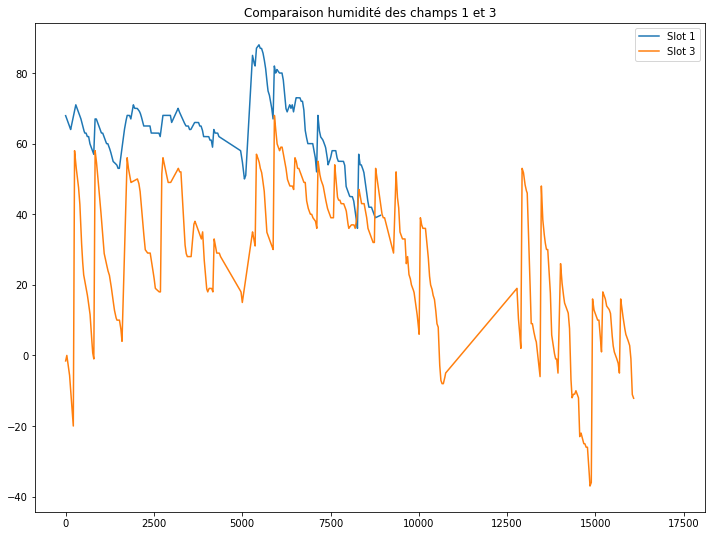

In [8]:
plt.figure(figsize=(12,9))
plt.plot(slot1, label="Slot 1")
plt.plot(slot3, label="Slot 3")
plt.legend()
plt.title("Comparaison humidité des champs 1 et 3")
plt.show()


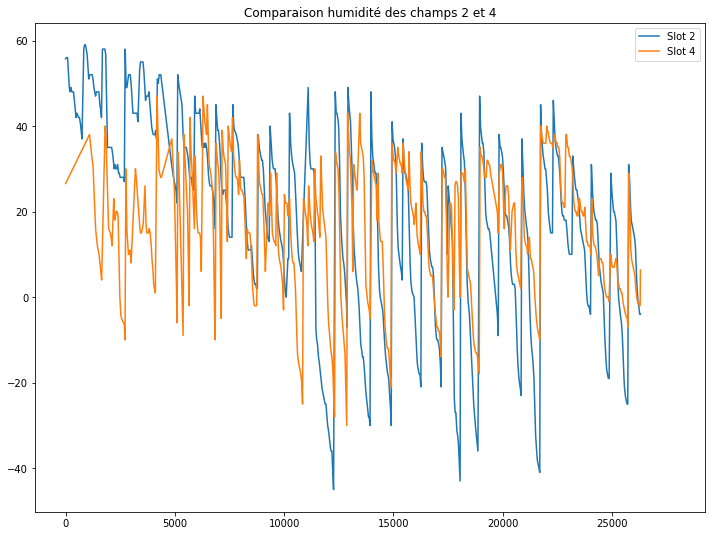

In [7]:
plt.figure(figsize=(12,9))
plt.plot(slot2, label="Slot 2")
plt.plot(slot4, label="Slot 4")
plt.legend()
plt.title("Comparaison humidité des champs 2 et 4")
plt.show()


Observons les donneées complémentaires

Text(0.5, 1.0, 'Air temperature (C)')

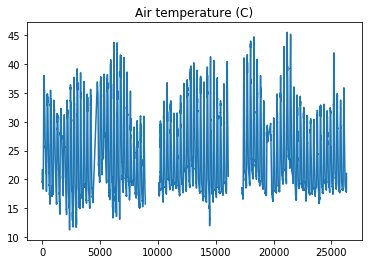

In [0]:
plt.plot(train['Air temperature (C)'])
plt.title('Air temperature (C)')

Text(0.5, 1.0, 'Air humidity (%)')

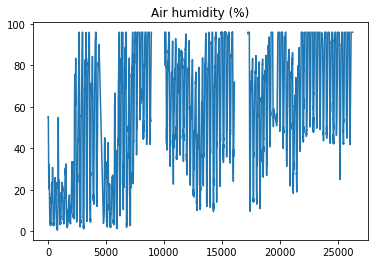

In [0]:
plt.plot(train['Air humidity (%)'])
plt.title('Air humidity (%)')

Text(0.5, 1.0, 'Pressure (KPa)')

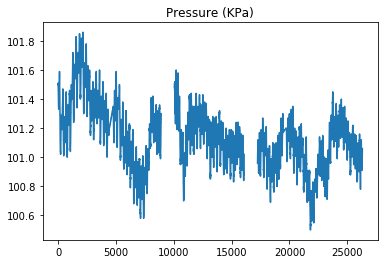

In [0]:
plt.plot(train['Pressure (KPa)'])
plt.title('Pressure (KPa)')

Text(0.5, 1.0, 'Wind speed (Km/h)')

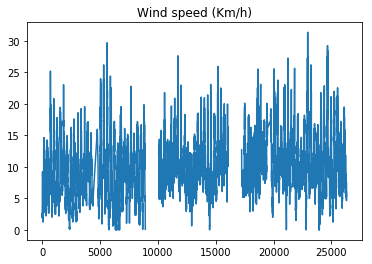

In [0]:
plt.plot(train['Wind speed (Km/h)'])
plt.title('Wind speed (Km/h)')

Text(0.5, 1.0, 'Wind gust (Km/h)')

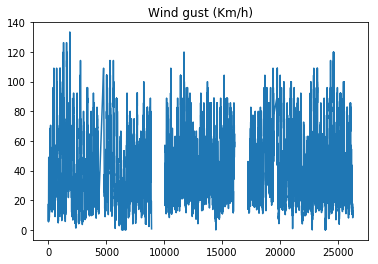

In [0]:
plt.plot(train['Wind gust (Km/h)'])
plt.title('Wind gust (Km/h)')


Text(0.5, 1.0, 'Wind direction (Deg)')

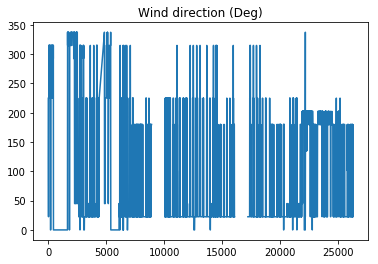

In [0]:
plt.plot(train['Wind direction (Deg)'])
plt.title('Wind direction (Deg)')


How many Nan do we have between 0,~11000 time points

In [0]:
mask1 = train['Air humidity (%)'].iloc[:11000].isna()
mask2 = train['Air humidity (%)'].iloc[15000:].isna()
nan_before_11k = sum(mask1)
nan_after_16k = sum(mask2)

print("We have {} nan before the 11000 th timepoint, and {} nan after the 15000 th timepoint ".format(nan_before_11k,nan_after_16k))

We have 1153 nan before the 11000 th timepoint, and 2901 nan after the 15000 th timepoint 


In [0]:
# Let's work with np array as it might make things easier

def visualize_between(first_day, last_day):
  # Dans un jour il y a 288 * 5 minutes
  start = first_day * 288
  last = last_day * 288
  fig, axs = plt.subplots(4,figsize=(12,9))
  axs[0].plot(slot1[start:last], label="Slot 1")  
  axs[0].plot(slot3[start:last], label="Slot 3")  
  axs[0].legend(bbox_to_anchor=(1, 0.5))


  axs[1].plot(irrigation1[start:last], label="Irrigation 1")  
  axs[1].plot(irrigation3[start:last], label="Irrigation 3")  
  axs[1].legend(bbox_to_anchor=(1, 0.5))
  
  axs[2].plot(slot2[start:last], label="Slot 2")
  axs[2].plot(slot4[start:last], label="Slot 4")
  axs[2].legend(bbox_to_anchor=(1, 0.5))
  
  axs[3].plot(irrigation2[start:last], label="Irrigation 2")
  axs[3].plot(irrigation4[start:last], label="Irrigation 4")   
  axs[3].legend(bbox_to_anchor=(1, 0.5))

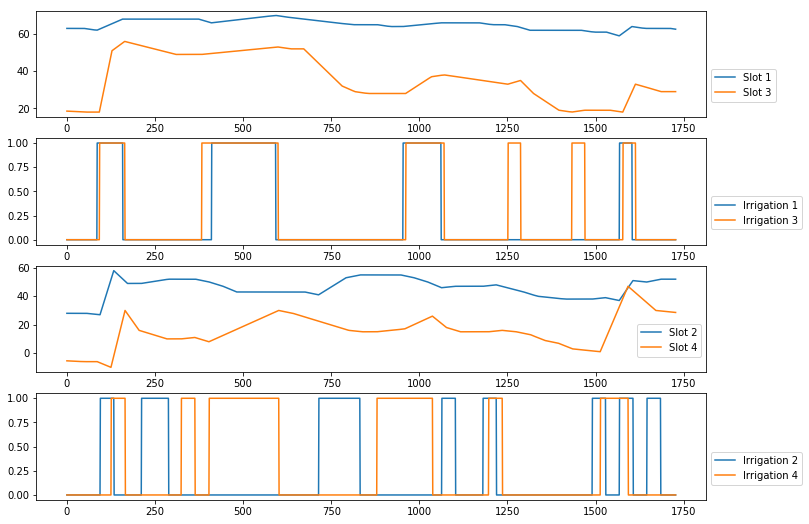

In [18]:
visualize_between(9, 15)